In [ ]:
#Importing all the Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

fb=pd.read_csv('HINDUNILVR.NS.csv',parse_dates=True,index_col='Date')
fb=fb.drop(columns=['Adj Close','Open','Low','High','Volume'])

Saving HINDUNILVR.NS.csv to HINDUNILVR.NS (1).csv


In [ ]:
fin =fb
fin

,Close
Date,
2008-01-01,218.449997
2008-01-02,215.800003
2008-01-03,222.850006
2008-01-04,232.050003
2008-01-07,237.199997
...,...
2020-10-26,2166.750000
2020-10-27,2176.699951
2020-10-28,2164.350098


In [ ]:
fb=fb.asfreq(freq='D',method='bfill')
fin = fin.asfreq(freq='D',method='bfill')
fin

,Close
Date,
2008-01-01,218.449997
2008-01-02,215.800003
2008-01-03,222.850006
2008-01-04,232.050003
2008-01-05,237.199997
...,...
2020-10-26,2166.750000
2020-10-27,2176.699951
2020-10-28,2164.350098


In [ ]:
fb

,Close
Date,
2008-01-01,218.449997
2008-01-02,215.800003
2008-01-03,222.850006
2008-01-04,232.050003
2008-01-05,237.199997
...,...
2020-10-26,2166.750000
2020-10-27,2176.699951
2020-10-28,2164.350098


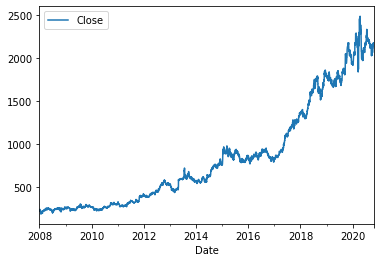

In [ ]:
fb.plot()


#Forecasting Procedure:
   
   1.)Choose a Model
   2.)Split the Data into Training and Test Data
   3.)Fit the Model on Training Data
   4.)Evaluate the Model on Test Data
   5.)Re-Fit the Model on Entire Data
   6.)Forecast for Future Data
   
   

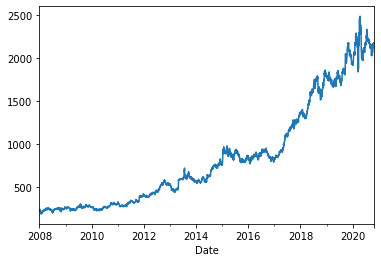

In [ ]:
fb['Close'].plot()

In [ ]:
fb=fb.fillna(method='ffill')
fin = fin.fillna(method='ffill')

In [ ]:
fb.isnull().values.any()
fin.isnull().values.any()

False

In [ ]:
breakup=seasonal_decompose(fb['Close'],model='additive')

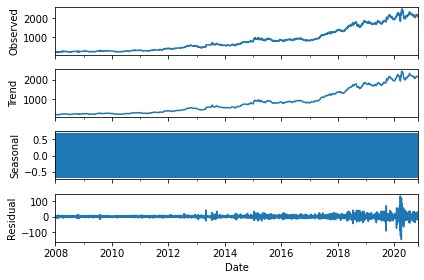

In [ ]:
breakup.plot();

In [ ]:
len(fb)

4687

In [ ]:
train_fb=fb.iloc[:-468]
test_fb=fb.iloc[-468:]

In [ ]:
train_fb.tail()

,Close
Date,
2019-07-16,1741.300049
2019-07-17,1760.699951
2019-07-18,1739.150024
2019-07-19,1720.400024
2019-07-20,1680.699951


In [ ]:
test_fb.head()

,Close
Date,
2019-07-21,1680.699951
2019-07-22,1680.699951
2019-07-23,1693.349976
2019-07-24,1728.650024
2019-07-25,1736.650024


# Exponential Smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
test_fb_model=ExponentialSmoothing(train_fb['Close'],trend='add',seasonal='mul',seasonal_periods=53).fit()

In [ ]:
test_fb_predictions=test_fb_model.forecast(468)

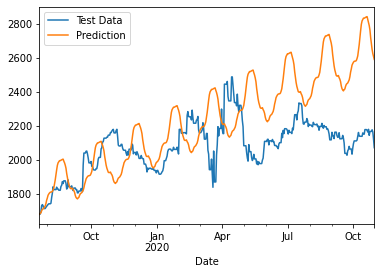

In [ ]:

test_fb['Close'].plot(legend=True,label='Test Data')
test_fb_predictions.plot(legend=True,label='Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
std=fb['Close'].std()
rmse=np.sqrt(mean_squared_error(test_fb['Close'],test_fb_predictions))
rmse,std

(281.5427979675597, 603.1485952525858)

In [ ]:
fb_ES_model=ExponentialSmoothing(fb['Close'],trend='add',seasonal='mul',seasonal_periods=90).fit()
fb_ES_Predictions=fb_ES_model.forecast(240)


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_fb['Close'], test_fb_predictions) 

219.53604136276874

In [ ]:
mape = np.mean(np.abs((test_fb['Close'] - test_fb_predictions)/test_fb['Close']))*100
mape

10.440611283803166

# ARIMA


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
fin

,Close
Date,
2008-01-01,218.449997
2008-01-02,215.800003
2008-01-03,222.850006
2008-01-04,232.050003
2008-01-05,237.199997
...,...
2020-10-26,2166.750000
2020-10-27,2176.699951
2020-10-28,2164.350098


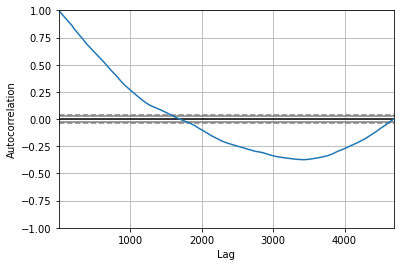

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fin)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 4685
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -19014.282
Method:                       css-mle   S.D. of innovations             13.995
Date:                Wed, 02 Dec 2020   AIC                          38036.564
Time:                        22:14:06   BIC                          38062.372
Sample:                    01-03-2008   HQIC                         38045.639
                         - 10-30-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.000      1.176      0.240      -0.000       0.000
ar.L1.D2.Close    -0.0541      0.015     -3.703      0.000      -0.083      -0.025
ma.L1.D2.Close    -1.0000      0.001

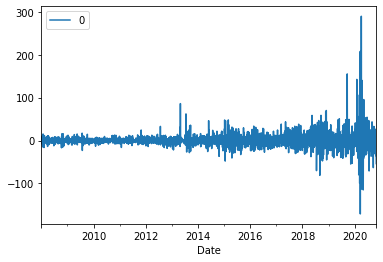

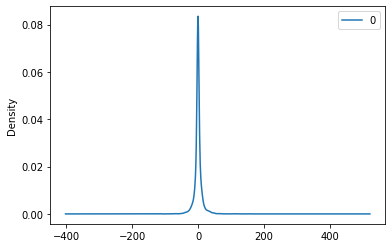

                 0
count  4685.000000
mean     -0.002210
std      13.999882
min    -171.282206
25%      -2.586905
50%      -0.358603
75%       2.082122
max     289.945894


In [ ]:
from pandas import DataFrame
model = ARIMA(fin, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
pyplot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
import math
from sklearn.metrics import mean_squared_error
X = fin.values
size = int(len(X) * 0.66)
train, test = X[0:1000], X[4501:4685]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,2,0))
	model_fit = model.fit(disp=1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))



predicted=308.852661, expected=2289.949951
predicted=4273.035631, expected=2231.750000
predicted=2173.494499, expected=2195.000000
predicted=2158.215934, expected=2082.649902
predicted=1970.190323, expected=2082.649902
predicted=2082.652544, expected=2082.649902
predicted=2082.652541, expected=2082.649902
predicted=2082.652539, expected=2041.500000
predicted=2000.311828, expected=2010.199951
predicted=1978.871451, expected=1992.050049
predicted=1973.884770, expected=2089.449951
predicted=2186.949010, expected=2048.000000
predicted=2006.511633, expected=2048.000000
predicted=2048.002621, expected=2048.000000
predicted=2048.002619, expected=2011.550049
predicted=1975.066732, expected=1995.750000
predicted=1979.936983, expected=2006.050049
predicted=2016.362857, expected=2032.099976
predicted=2058.178151, expected=2005.250000
predicted=1978.376229, expected=2005.250000
predicted=2005.252603, expected=2005.250000
predicted=2005.252601, expected=1975.550049
predicted=1945.823578, expected=1

In [ ]:
error = mean_squared_error(test, predictions)
rmse = math.sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot

Test RMSE: 212.203


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test, predictions) 

44.917677061728185

In [ ]:
mape = np.mean(np.abs((test - predictions)/test))*100
mape

2.049758196357091

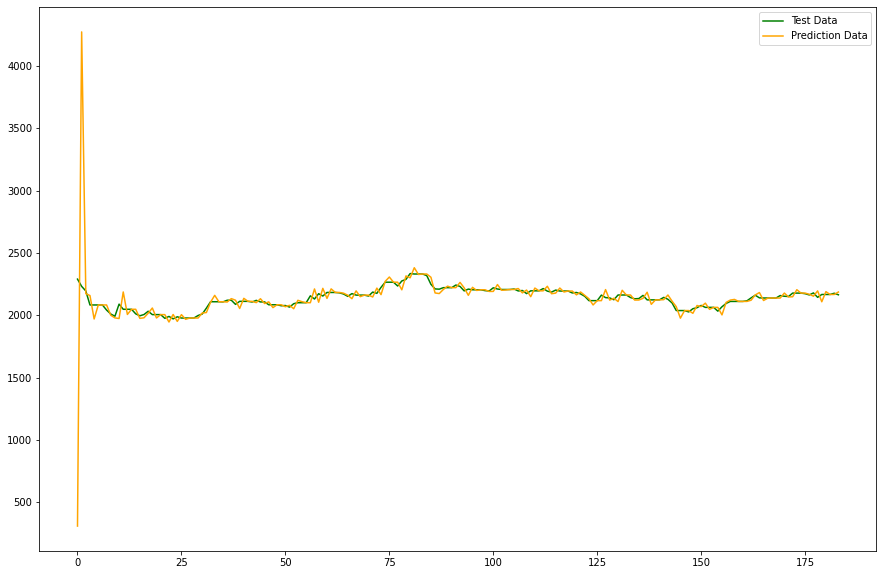

In [ ]:
plt.figure(figsize=(15,10))

pyplot.plot(test, color = 'green')
pyplot.plot(predictions, color='orange')
pyplot.legend(['Test Data','Prediction Data'])
pyplot.show()

## NEW ARIMA


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()